In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [13]:
training = pd.read_csv("0000000000002429_training_titanic_x_y_train.csv")
testing = pd.read_csv("0000000000002429_test_titanic_x_test.csv")

In [14]:
training

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
663,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S,1
664,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q,0
665,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,1
666,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,0


In [15]:
testing

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S
...,...,...,...,...,...,...,...,...,...,...
218,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S
219,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S
220,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
221,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S


In [16]:
training.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,668.000000,536.000000,668.000000,668.000000,668.000000,668.000000
mean,2.296407,29.700560,0.528443,0.407186,32.064552,0.402695
std,0.831638,14.240257,1.080327,0.854695,45.320835,0.490808
min,1.000000,0.670000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,29.000000,0.000000,0.000000,14.750000,0.000000
75%,3.000000,38.250000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [17]:
training.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')

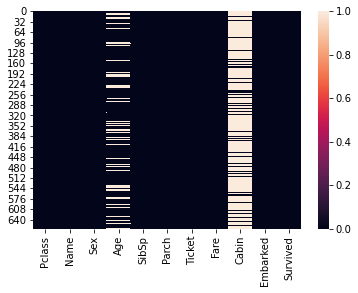

In [18]:
sns.heatmap(training.isnull())

In [35]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Parch', 'Embarked']
X = training[features]
# X_train = training.drop("Survived", axis = 1)
y = training['Survived']

In [28]:
# handling missing values for age
age = X["Age"].mean()
age

0.5284431137724551

In [98]:
X["Age"].isnull().sum()

KeyError: 'Embarked'

In [30]:
training.iloc[:, 3:4]

,Age
0,29.0
1,NaN
2,39.0
3,29.0
4,25.0
...,...
663,17.0
664,NaN
665,32.0
666,22.0


##### missing values in Age and Cabin.. repleasing NAN with mean

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.NaN, strategy = "mean")
imputer = imputer.fit(training.iloc[: , 3:4])
training["Age"] = imputer.fit_transform(training.iloc[:, 3:4])
training["Age"].describe()

count    668.000000
mean      29.700560
std       12.753571
min        0.670000
25%       23.000000
50%       29.700560
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [37]:
X["Age"].mean()

29.700559701492537

In [47]:
#training["Age"] = training["Age"].round()
#training["Age"]

In [38]:
X.describe()

,Pclass,Age,SibSp,Fare,Parch
count,668.000000,668.000000,668.000000,668.000000,668.000000
mean,2.296407,29.700560,0.528443,32.064552,0.407186
std,0.831638,12.753571,1.080327,45.320835,0.854695
min,1.000000,0.670000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,7.925000,0.000000
50%,3.000000,29.700560,0.000000,14.750000,0.000000
75%,3.000000,35.000000,1.000000,31.275000,0.000000
max,3.000000,80.000000,8.000000,512.329200,6.000000


In [49]:
'''
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Parch', 'Embarked']
X_train = training[features]
# X_train = training.drop("Survived", axis = 1)
Y_train = training['Survived']
'''

'\nfeatures = [\'Pclass\', \'Sex\', \'Age\', \'SibSp\', \'Fare\', \'Parch\', \'Embarked\']\nX_train = training[features]\n# X_train = training.drop("Survived", axis = 1)\nY_train = training[\'Survived\']\n'

In [39]:
X.head()

,Pclass,Sex,Age,SibSp,Fare,Parch,Embarked
0,2,female,29.00000,1,26.000,0,S
1,3,male,29.70056,0,8.050,0,S
2,2,male,39.00000,0,26.000,0,S
3,3,female,29.00000,0,21.075,4,S
4,3,male,25.00000,0,7.050,0,S


### sex and embarked are strings, needs to be converted to binary values

In [40]:
sex = pd.get_dummies(X["Sex"], drop_first = True)
sex

,male
0,0
1,1
2,1
3,0
4,1
...,...
663,0
664,1
665,1
666,0


In [41]:
embarked = pd.get_dummies(X["Embarked"], drop_first = True)
embarked

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
663,0,1
664,1,0
665,0,1
666,0,1


### appending these features to training ds

In [42]:
X = pd.concat([X, sex, embarked], axis = 1)
X.head()

,Pclass,Sex,Age,SibSp,Fare,Parch,Embarked,male,Q,S
0,2,female,29.00000,1,26.000,0,S,0,0,1
1,3,male,29.70056,0,8.050,0,S,1,0,1
2,2,male,39.00000,0,26.000,0,S,1,0,1
3,3,female,29.00000,0,21.075,4,S,0,0,1
4,3,male,25.00000,0,7.050,0,S,1,0,1


### now drop the org feature

In [43]:
X.drop(["Sex", "Embarked"], axis = 1, inplace = True)

In [44]:
X.describe()

,Pclass,Age,SibSp,Fare,Parch,male,Q,S
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,2.296407,29.700560,0.528443,32.064552,0.407186,0.639222,0.074850,0.724551
std,0.831638,12.753571,1.080327,45.320835,0.854695,0.480586,0.263347,0.447075
min,1.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,7.925000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.700560,0.000000,14.750000,0.000000,1.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,31.275000,0.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,512.329200,6.000000,1.000000,1.000000,1.000000


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)# default test_size = 0.25

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 245)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=245)

In [81]:
lr.score(X_train, y_train)

0.7790262172284644

### testing in training set

In [82]:
lr.score(X_test, y_test)

0.835820895522388

### now try with testing ds

In [83]:
testing

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S
...,...,...,...,...,...,...,...,...,...,...
218,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S
219,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S
220,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
221,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S


In [84]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Fare', 'Parch', 'male', 'Q', 'S'], dtype='object')

In [85]:
X_test = testing[features]
X_test.describe()

,Pclass,Age,SibSp,Fare,Parch
count,223.000000,178.000000,223.000000,223.000000,223.000000
mean,2.345291,29.694775,0.506726,32.622551,0.304933
std,0.850047,15.398053,1.169700,61.062047,0.634108
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,19.250000,0.000000,7.879200,0.000000
50%,3.000000,27.000000,0.000000,12.475000,0.000000
75%,3.000000,37.750000,1.000000,30.035400,0.000000
max,3.000000,71.000000,8.000000,512.329200,2.000000


### age has missing values

In [86]:
imputer = SimpleImputer(missing_values = np.NaN, strategy = "mean")
imputer = imputer.fit(X_test.iloc[:, 2:3])

In [87]:
X_test["Age"] = imputer.fit_transform(X_test.iloc[:, 2:3])

<ipython-input-87-8e059cf362e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Age"] = imputer.fit_transform(X_test.iloc[:, 2:3])


In [88]:
X_test["Age"].isnull().sum()

0

In [89]:
X_test["Age"].mean()

29.6947752808989

In [90]:
X_test

,Pclass,Sex,Age,SibSp,Fare,Parch,Embarked
0,2,male,8.000000,1,36.7500,1,S
1,1,female,49.000000,0,25.9292,0,S
2,3,male,29.694775,0,7.7375,0,Q
3,2,female,24.000000,2,27.0000,1,S
4,1,male,36.000000,0,26.2875,0,S
...,...,...,...,...,...,...,...
218,3,male,20.000000,1,7.9250,0,S
219,1,male,45.000000,0,26.5500,0,S
220,1,female,17.000000,1,108.9000,0,C
221,3,male,43.000000,0,6.4500,0,S


In [91]:
sex = pd.get_dummies(X_test["Sex"], drop_first = True)
sex

,male
0,1
1,0
2,1
3,0
4,1
...,...
218,1
219,1
220,0
221,1


In [92]:
embarked = pd.get_dummies(X_test["Embarked"], drop_first = True)
embarked

,Q,S
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
218,0,1
219,0,1
220,0,0
221,0,1


In [93]:
X_test = pd.concat([X_test, sex, embarked], axis = 1)
X_test

,Pclass,Sex,Age,SibSp,Fare,Parch,Embarked,male,Q,S
0,2,male,8.000000,1,36.7500,1,S,1,0,1
1,1,female,49.000000,0,25.9292,0,S,0,0,1
2,3,male,29.694775,0,7.7375,0,Q,1,1,0
3,2,female,24.000000,2,27.0000,1,S,0,0,1
4,1,male,36.000000,0,26.2875,0,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...
218,3,male,20.000000,1,7.9250,0,S,1,0,1
219,1,male,45.000000,0,26.5500,0,S,1,0,1
220,1,female,17.000000,1,108.9000,0,C,0,0,0
221,3,male,43.000000,0,6.4500,0,S,1,0,1


In [94]:
X_test.drop(["Sex", "Embarked"], axis = 1, inplace = True)
X_test

,Pclass,Age,SibSp,Fare,Parch,male,Q,S
0,2,8.000000,1,36.7500,1,1,0,1
1,1,49.000000,0,25.9292,0,0,0,1
2,3,29.694775,0,7.7375,0,1,1,0
3,2,24.000000,2,27.0000,1,0,0,1
4,1,36.000000,0,26.2875,0,1,0,1
...,...,...,...,...,...,...,...,...
218,3,20.000000,1,7.9250,0,1,0,1
219,1,45.000000,0,26.5500,0,1,0,1
220,1,17.000000,1,108.9000,0,0,0,0
221,3,43.000000,0,6.4500,0,1,0,1


In [95]:
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [96]:
np.savetxt(X = y_pred, fname = "Predicted.csv", delimiter = ",", fmt = "%.5f")